# Libs and Data Prep

In [1]:
import pandas as pd
import numpy as np
from random import random 
import matplotlib.pyplot as plt

import os 
from pathlib import Path

         Date        Close    Volume       mom      mom1      mom2      mom3  \
0  2009-12-31  1115.099976       NaN       NaN       NaN       NaN       NaN   
1  2010-01-04  1132.989990  0.921723  0.016043       NaN       NaN       NaN   
2  2010-01-05  1136.520020 -0.375903  0.003116  0.016043       NaN       NaN   
3  2010-01-06  1137.140015  0.996234  0.000546  0.003116  0.016043       NaN   
4  2010-01-07  1141.689941  0.059932  0.004001  0.000546  0.003116  0.016043   

   ROC_5  ROC_10  ROC_15  ...   NZD  silver-F  RUSSELL-F  S&P-F   CHF  \
0    NaN     NaN     NaN  ...  0.03      0.26      -1.08  -1.00 -0.11   
1    NaN     NaN     NaN  ...  1.52      3.26       1.61   1.62 -0.57   
2    NaN     NaN     NaN  ... -0.07      1.96      -0.20   0.31  0.43   
3    NaN     NaN     NaN  ...  0.56      2.15      -0.02   0.07 -0.56   
4    NaN     NaN     NaN  ... -0.72      0.94       0.50   0.40  0.58   

   Dollar index-F  Dollar index  wheat-F   XAG   XAU  
0           -0.08        

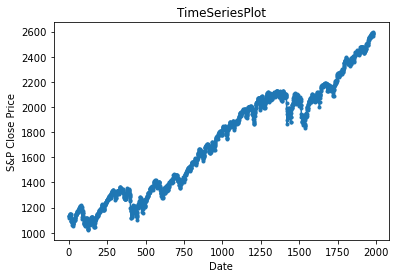

(1511, 84) (473, 84)



In [2]:
os.getcwd()
data=Path(r'C:\Users\hiwuq\OneDrive\Qian Learning\ML\Datasets')

df=pd.read_csv(data/'Processed_S&P.csv',header=0)

print(df.head(5))
df.info()

# Changing the datatype
df["Date"] = df["Date"].astype("datetime64")
 
# Setting the Date as index
#df = df.set_index("Date")

# Plot
plt.plot(df["Close"], marker='.')

# Labelling 
plt.xlabel("Date")
plt.ylabel("S&P Close Price")
plt.title("TimeSeriesPlot")

# Display
plt.show()

# Create train and test datasets
train=df.loc[(df.Date>='2009-12-31')&(df.Date<'2016-01-01')]
test=df.loc[df.Date>='2016-01-01']

print(train.shape,test.shape)
print()


## AR

D:\Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


1511    2027.659873
1512    2043.582176
1513    2066.427807
1514    2056.872018
1515    2054.965366
           ...     
1979    2224.109311
1980    2222.454435
1981    2234.439613
1982    2242.841921
1983    2243.354999
Length: 473, dtype: float64


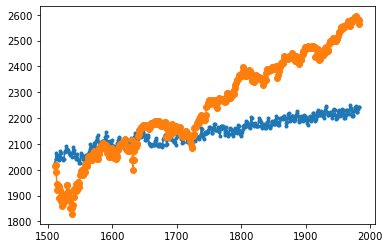

In [90]:
from statsmodels.tsa.ar_model import AutoReg

p=300
AR_model=AutoReg(train['Close'],lags=p)
AR_fit=AR_model.fit()

data=pd.concat([train['Close'],test['Close']],axis=0)
yhat=AR_fit.predict(test.index[0],test.index[len(test)-1])
print(yhat)


plt.plot(yhat, marker='.')
plt.plot(test['Close'], marker='o')
plt.show()

## MA

D:\Softwares\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1511    2082.936322
1512    1928.538295
1513    1796.719613
1514    1605.327103
1515    1521.710355
           ...     
1979    1570.484784
1980    1570.484784
1981    1570.484784
1982    1570.484784
1983    1570.484784
Name: predicted_mean, Length: 473, dtype: float64


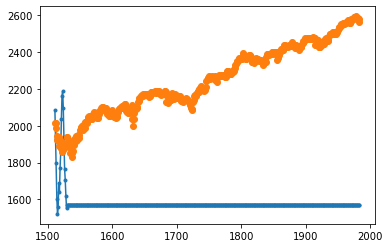

In [7]:
from statsmodels.tsa.arima.model import ARIMA

MA_model=ARIMA(train['Close'],order=(0,0,20))
MA_fit=MA_model.fit()

data=pd.concat([train['Close'],test['Close']],axis=0)
yhat=MA_fit.predict(test.index[0],test.index[len(test)-1])
print(yhat)


plt.plot(yhat, marker='.')
plt.plot(test['Close'], marker='o')
plt.show()

## ARMA

D:\Softwares\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1511    2041.894765
1512    2043.798825
1513    2044.034664
1514    2043.179215
1515    2043.024040
           ...     
1979    1921.711667
1980    1921.483430
1981    1921.256158
1982    1921.029848
1983    1920.802712
Name: predicted_mean, Length: 473, dtype: float64


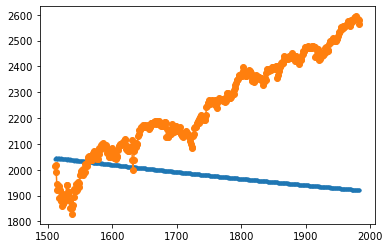

In [9]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA_model=ARIMA(train['Close'],order=(5,0,10))
ARIMA_fit=ARIMA_model.fit()

data=pd.concat([train['Close'],test['Close']],axis=0)
yhat=ARIMA_fit.predict(test.index[0],test.index[len(test)-1])
print(yhat)


plt.plot(yhat, marker='.')
plt.plot(test['Close'], marker='o')
plt.show()

## ARIMA

D:\Softwares\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1511    2039.263846
1512    2043.910583
1513    2046.573219
1514    2043.854172
1515    2047.842038
           ...     
1979    2332.218120
1980    2332.847009
1981    2333.410129
1982    2334.036498
1983    2334.685641
Name: predicted_mean, Length: 473, dtype: float64


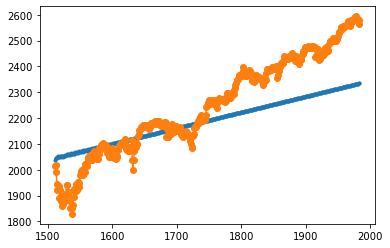

In [10]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA_model=ARIMA(train['Close'],order=(3,2,10))
ARIMA_fit=ARIMA_model.fit()

data=pd.concat([train['Close'],test['Close']],axis=0)
yhat=ARIMA_fit.predict(test.index[0],test.index[len(test)-1])
print(yhat)


plt.plot(yhat, marker='.')
plt.plot(test['Close'], marker='o')
plt.show()

## SARIMA

1511    2043.747905
1512    2043.157256
1513    2043.265926
1514    2044.932534
1515    2045.609134
           ...     
1979    2046.105133
1980    2046.105133
1981    2046.105133
1982    2046.105133
1983    2046.105133
Name: predicted_mean, Length: 473, dtype: float64


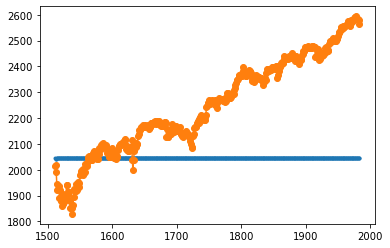

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMA_model=SARIMAX(train['Close'],order=(2,1,5), seasonal_order=(0,0,0,0))
SARIMA_fit=SARIMA_model.fit(disp=False)

data=pd.concat([train['Close'],test['Close']],axis=0)
yhat=SARIMA_fit.predict(test.index[0],test.index[len(test)-1])
print(yhat)


plt.plot(yhat, marker='.')
plt.plot(test['Close'], marker='o')
plt.show()

## SARIMAX

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAX_model=SARIMAX(train['Close'],exog=train['Volume'],order=(2,1,5), seasonal_order=(0,0,0,0))
SARIMA_fit=SARIMA_model.fit()

data=pd.concat([train['Close'],test['Close']],axis=0)
yhat=SARIMA_fit.predict(test.index[0],test.index[len(test)-1], exog=test['ROC_5'])
print(yhat)

plt.plot(yhat, marker='.')
plt.plot(test['Close'], marker='o')
plt.show()

MissingDataError: exog contains inf or nans

## VAR

D:\Softwares\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


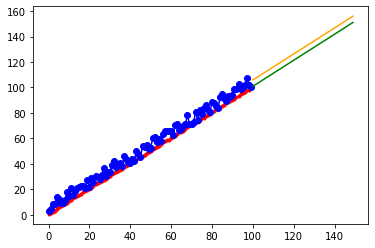

In [71]:
from statsmodels.tsa.vector_ar.var_model import VAR

v1=np.arange(100)+np.random.rand(100)
v2=v1+np.random.rand(100)*10
data=list(map(list,zip(v1,v2)))

VAR_model=VAR(data)
VAR_fit=VAR_model.fit()
yhat=VAR_fit.forecast(VAR_fit.y, steps=50)
#print(yhat)

plt.plot(v1, marker='.', color='red')
plt.plot(v2, marker='o', color='blue')
plt.plot([None]*100+[pred[0] for pred in yhat], color='green')
plt.plot([None]*100+[pred[1] for pred in yhat], color='orange')
plt.show()

## VARMA

D:\Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[1.07715783 1.55674397]
 [1.16944657 1.70327595]
 [1.2254311  1.64696103]
 [1.21881986 1.70425617]
 [1.11801343 1.56784892]
 [1.09592649 1.60147568]
 [1.12117645 1.63091679]
 [1.12622018 1.60770266]
 [1.12006349 1.61832894]
 [1.09450182 1.58845786]
 [1.08131604 1.58099022]
 [1.08235764 1.58355845]
 [1.07889304 1.57338319]
 [1.07272982 1.57005948]
 [1.06342709 1.56043399]
 [1.056065   1.55315338]
 [1.05229023 1.54967816]
 [1.04793183 1.54372989]
 [1.04300321 1.53897955]
 [1.03775603 1.53364068]
 [1.03295438 1.52854654]
 [1.02908726 1.52457886]
 [1.02531851 1.52034007]
 [1.02153696 1.51638275]
 [1.01785464 1.51255843]
 [1.01438307 1.50886768]
 [1.01122915 1.50555177]
 [1.00823258 1.50233626]
 [1.00534062 1.49927344]
 [1.00258075 1.49637058]
 [0.99996668 1.49359891]
 [0.99751458 1.49100561]
 [0.99519143 1.48853878]
 [0.99297709 1.48619203]
 [0.99087378 1.48396913]
 [0.98888005 1.48185735]
 [0.9869946  1.47986093]
 [0.9852078  1.47796775]
 [0.98351109 1.47617031]
 [0.98190141 1.47446659]


D:\Softwares\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


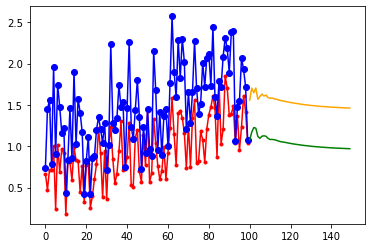

In [77]:
from statsmodels.tsa.statespace.varmax import VARMAX

v1=np.arange(100)/100+np.random.rand(100)
v2=v1+np.random.rand(100)
data=list(map(list,zip(v1,v2)))

VARMA_model=VARMAX(data, order=(5,1))
VARMA_fit=VARMA_model.fit()
yhat=VARMA_fit.forecast(steps=50)
#print(yhat)

plt.plot(v1, marker='.', color='red')
plt.plot(v2, marker='o', color='blue')
plt.plot([None]*100+[pred[0] for pred in yhat], color='green')
plt.plot([None]*100+[pred[1] for pred in yhat], color='orange')
plt.show()

## VARMAX

D:\Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
D:\Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


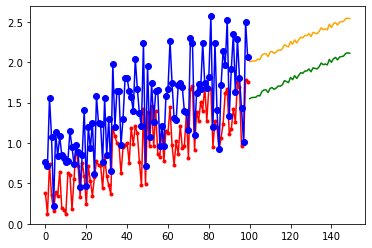

In [106]:
from statsmodels.tsa.statespace.varmax import VARMAX

v1=np.arange(100)/100+np.random.rand(100)
v2=v1+np.random.rand(100)
data=list(map(list,zip(v1,v2)))
data_exog=np.arange(100)+np.random.rand(100)*5
data_exog2=np.arange(start=100, stop=150)+np.random.rand(50)*5

VARMAX_model=VARMAX(data, exog=data_exog,order=(1,1))
VARMAX_fit=VARMAX_model.fit()
yhat=VARMAX_fit.forecast(steps=50,exog=data_exog2)
#print(yhat)

plt.plot(v1, marker='.', color='red')
plt.plot(v2, marker='o', color='blue')
#plt.plot(list(data_exog)+list(data_exog2),  color='purple')
plt.plot([None]*100+[pred[0] for pred in yhat], color='green')
plt.plot([None]*100+[pred[1] for pred in yhat], color='orange')
plt.show()

## SES

D:\Softwares\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


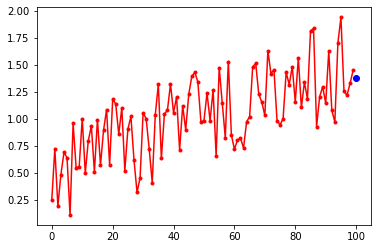

In [126]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

data=np.arange(100)/100+np.random.rand(100)

SES_model=SimpleExpSmoothing(data)
SES_fit=SES_model.fit()
yhat=SES_fit.predict()
#print(yhat,len(yhat),len(data))

plt.plot(list(data), marker='.', color='red')
plt.plot([None]*100+[yhat], marker='o', color='blue')
plt.show()

## Holt Winters

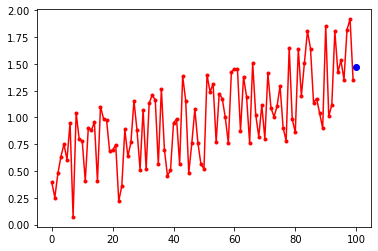

In [127]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data=np.arange(100)/100+np.random.rand(100)

HW_model=SimpleExpSmoothing(data)
HW_fit=HW_model.fit()
yhat=HW_fit.predict()
#print(yhat,len(yhat),len(data))

plt.plot(list(data), marker='.', color='red')
plt.plot([None]*100+[yhat], marker='o', color='blue')
plt.show()